# Introduction
This is a comprehensive notebook that might be useful to data scientists in Telecom industry. It studies the case of Customers Churning which is very common in Telecommunication companies. In this project, I did EDA, perdictive modelling and customers clustering. Churn analysis is the evaluation of a company’s customer loss rate in order to reduce it. Also referred to as customer attrition rate. It's importatnt because keeping an existing customer saves more money to the company than attracting a new one. Churn rate has strong impact on the life time value of the customer because it affects the length of service and the future revenue of the company.

# Load libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from mlxtend.preprocessing import minmax_scaling
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import pylab as pl
from kmodes.kmodes import KModes

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telecom-churn-datasets/churn-bigml-20.csv
/kaggle/input/telecom-churn-datasets/churn-bigml-80.csv


# Read the data

The author has divided the original data into two datasets, train and test, where he sampled 80% of the data into train and validation data and 20% into test data.

In [2]:
train = pd.read_csv('../input/telecom-churn-datasets/churn-bigml-80.csv')
test = pd.read_csv('../input/telecom-churn-datasets/churn-bigml-20.csv')

# Explore train and test data

In [3]:
train.sample(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
2340,NV,148,415,No,No,0,279.3,104,47.48,201.6,87,17.14,280.8,99,12.64,7.9,2,2.13,2,True
821,CA,112,415,No,No,0,111.9,92,19.02,114.0,143,9.69,146.8,79,6.61,14.1,3,3.81,5,True
381,WV,72,510,No,Yes,33,96.6,59,16.42,315.4,98,26.81,163.3,117,7.35,6.2,4,1.67,4,True
1941,WV,21,415,No,No,0,91.9,109,15.62,198.4,111,16.86,171.7,125,7.73,13.0,7,3.51,2,False
550,KS,99,415,No,No,0,191.2,110,32.50,163.9,102,13.93,243.6,114,10.96,14.1,3,3.81,1,False
1089,CT,141,408,No,No,0,51.9,108,8.82,162.0,83,13.77,223.5,115,10.06,10.1,3,2.73,3,False
2119,AL,102,415,No,No,0,123.1,106,20.93,182.0,102,15.47,244.6,75,11.01,12.6,7,3.40,2,False
1375,NV,115,415,No,No,0,286.4,125,48.69,205.7,74,17.48,191.4,141,8.61,6.9,6,1.86,1,True
1540,MO,42,415,No,No,0,184.5,98,31.37,200.5,93,17.04,279.2,91,12.56,8.8,3,2.38,2,False
236,IN,166,510,No,No,0,204.2,115,34.71,179.9,152,15.29,216.8,109,9.76,9.5,5,2.57,1,False


In [4]:
train.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
test.sample(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
506,VA,163,415,No,No,0,202.9,100,34.49,178.6,46,15.18,203.8,116,9.17,12.8,3,3.46,5,False
235,IL,130,415,No,No,0,155.9,95,26.50,256.1,97,21.77,262.9,103,11.83,11.7,3,3.16,3,False
162,TN,33,415,No,Yes,35,186.8,124,31.76,261.0,69,22.19,317.8,103,14.30,15.0,5,4.05,0,False
646,OK,112,415,No,No,0,166.0,79,28.22,74.6,100,6.34,247.9,74,11.16,6.3,7,1.70,0,False
5,AK,36,408,No,Yes,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0,False
425,MS,69,510,No,Yes,27,268.8,78,45.70,246.6,89,20.96,271.9,102,12.24,16.4,3,4.43,0,False
378,IN,101,415,No,Yes,42,209.2,82,35.56,159.7,74,13.57,181.6,100,8.17,9.5,3,2.57,0,False
153,VA,158,415,No,No,0,222.8,101,37.88,203.0,128,17.26,210.6,106,9.48,6.9,2,1.86,2,False
198,MS,114,415,No,Yes,34,154.4,109,26.25,221.4,142,18.82,208.5,103,9.38,10.3,5,2.78,0,False
52,SD,144,408,No,Yes,48,189.8,96,32.27,123.4,67,10.49,214.2,106,9.64,6.5,2,1.76,2,True


In [6]:
test.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,102.841079,436.157421,8.407796,180.948126,100.937031,30.761769,203.355322,100.476762,17.285262,199.685307,100.113943,8.985907,10.238381,4.527736,2.764948,1.563718
std,40.819480,41.783305,13.994480,55.508628,20.396790,9.436463,49.719268,18.948262,4.226160,49.759931,20.172505,2.239429,2.807850,2.482442,0.758167,1.333357
min,1.000000,408.000000,0.000000,25.900000,30.000000,4.400000,48.100000,37.000000,4.090000,23.200000,42.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,408.000000,0.000000,146.250000,87.500000,24.860000,171.050000,88.000000,14.540000,167.950000,86.000000,7.560000,8.600000,3.000000,2.320000,1.000000
50%,102.000000,415.000000,0.000000,178.300000,101.000000,30.310000,203.700000,101.000000,17.310000,201.600000,100.000000,9.070000,10.500000,4.000000,2.840000,1.000000
75%,128.000000,415.000000,20.000000,220.700000,115.000000,37.520000,236.450000,113.000000,20.095000,231.500000,113.500000,10.420000,12.050000,6.000000,3.255000,2.000000
max,232.000000,510.000000,51.000000,334.300000,165.000000,56.830000,361.800000,168.000000,30.750000,367.700000,175.000000,16.550000,18.300000,18.000000,4.940000,8.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

# EDA

In [9]:
train['State'].nunique()

51

In [10]:
train['State'].value_counts()

WV    88
MN    70
NY    68
VA    67
OH    66
AL    66
WY    66
OR    62
NV    61
WI    61
UT    60
MD    60
CT    59
CO    59
MI    58
VT    57
NC    56
ID    56
TX    55
IN    54
FL    54
MT    53
OK    52
MA    52
KS    52
MO    51
DE    51
NJ    50
GA    49
ME    49
SC    49
SD    49
MS    48
RI    48
WA    48
AR    47
DC    45
NE    45
IL    45
AZ    45
HI    44
NM    44
ND    44
KY    43
AK    43
NH    43
TN    41
IA    38
PA    36
LA    35
CA    24
Name: State, dtype: int64

In [11]:
print('The percentage of customers churning from the company is: %{}'.format((train['Churn'].sum()) *100/train.shape[0]) ) # as the Churn column data type is boolean, every True value will be summed as '1'...I'll convert them later into binary 0's and 1's when I do the data cleaning part

The percentage of customers churning from the company is: %14.553638409602401


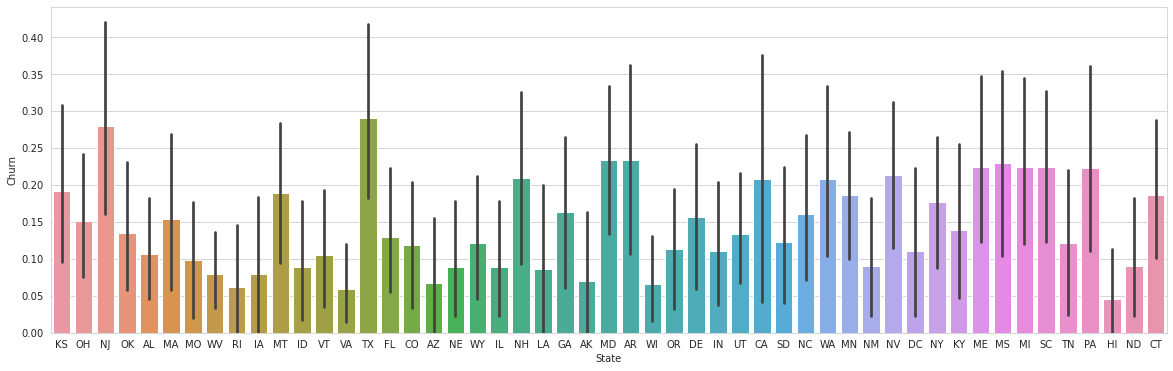

In [12]:
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
sns.barplot(x='State',y='Churn', data=train)

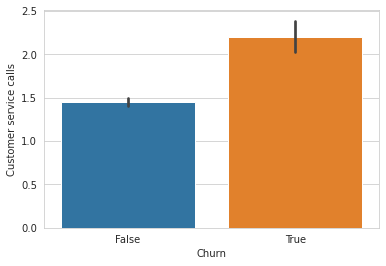

In [13]:
sns.barplot(x='Churn', y='Customer service calls',data=train)

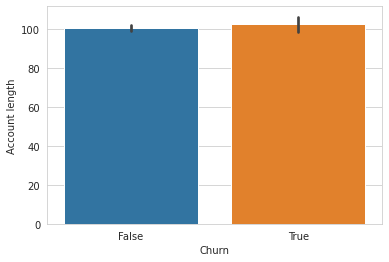

In [14]:
sns.barplot(x='Churn', y='Account length',data=train)

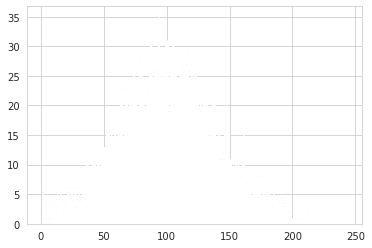

In [15]:
plt.hist(train['Account length'], bins=400)
plt.show()

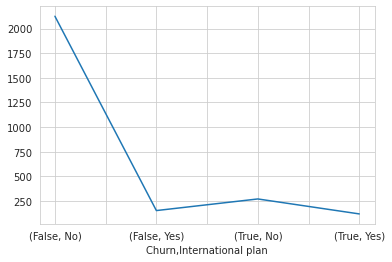

In [16]:
churn_intl = train.groupby(['Churn','International plan']).size()
churn_intl.plot()
plt.show()


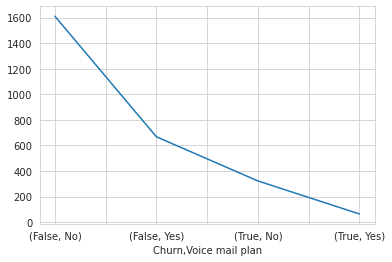

In [17]:
churn_voicem = train.groupby(['Churn','Voice mail plan']).size()
churn_voicem.plot()
plt.show()

In [18]:
train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [19]:
train['Total charge'] = train['Total day charge'] + train['Total eve charge'] + train['Total night charge'] + train['Total intl charge']
test['Total charge'] = test['Total day charge'] + test['Total eve charge'] + test['Total night charge'] + test['Total intl charge']

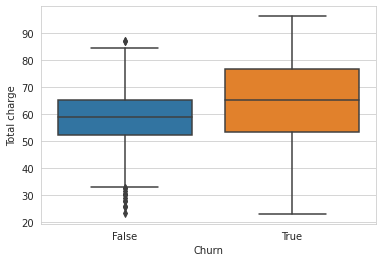

In [20]:
sns.boxplot(x='Churn',y='Total charge', data = train)

From the previous analysis we knew the following insights:
* 14% of customers have churned.
* Texas has the highest number of customer churns.
* Churned customers have called customer service more than remaining customers. Maybe that means that customer service in this company needs more training in retaining customers.
* Churned customers had higher charges to pay than remaining cutomers. Maybe that means that the company needs to work in more effective plans to facilitate late payments.
* Account length (Account duration) is normally distributed.


# Data cleaning

Now,we'll clean the data and prepare it for prediction.


As you noticed earlier, when we used .info() with both train and test datasets, we haven't found any null values ( luckily!), but if we had found them, we would either drop columns with the missing values or impute the missing values to the mean, median or mode of the values in the same column.

We still have columns with categorical values though (dtype = object), so we should deal with them because predictive models deal only with numerical values.

For 'Churn', 'International plan' and 'Voice mail plan' columns, I will use multiple techniques to deal with categorical values for illustration purpose, but you can use only one of them if you want, since each of the 3 column has only 2 unique values.

But first, let's work on a copy of the original dataset. ( It's always a good idea to work on copies, not on the original data)

In [21]:
train2 = train.copy()
test2 = test.copy()
train2

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,75.56
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,59.24
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,62.29
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,66.80
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,52.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,...,16.12,221.4,128,9.96,11.8,5,3.19,2,False,52.17
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,...,18.32,279.1,83,12.56,9.9,6,2.67,2,False,60.10
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,...,13.04,191.3,123,8.61,9.6,4,2.59,3,False,63.53
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,...,24.55,191.9,91,8.64,14.1,6,3.81,2,False,67.74


In [22]:
train2['Churn'] = train2['Churn'].map({True:1,False:0}) # no need to do it for test dataset because Churn column will be dropped later.

train2['International plan'].replace(['No','Yes'],[0,1],inplace=True)
test2['International plan'].replace(['No','Yes'],[0,1],inplace=True)

# Now, I'll use the label encoder preprocessing technique:

encoder = LabelEncoder()
coded_voicem_train = encoder.fit_transform(train2['Voice mail plan'])
train2['Voice mail plan'] = coded_voicem_train
coded_voicem_test = encoder.transform(test2['Voice mail plan'])
test2['Voice mail plan'] = coded_voicem_test

In [23]:
train2.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,75.56
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,59.24
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,62.29
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,66.80
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,52.09


In [24]:
test2.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge
0,LA,117,408,0,0,0,184.5,97,31.37,351.6,...,29.89,215.8,90,9.71,8.7,4,2.35,1,False,73.32
1,IN,65,415,0,0,0,129.1,137,21.95,228.5,...,19.42,208.8,111,9.40,12.7,6,3.43,4,True,54.20
2,NY,161,415,0,0,0,332.9,67,56.59,317.8,...,27.01,160.6,128,7.23,5.4,9,1.46,4,True,92.29
3,SC,111,415,0,0,0,110.4,103,18.77,137.3,...,11.67,189.6,105,8.53,7.7,6,2.08,2,False,41.05
4,HI,49,510,0,0,0,119.3,117,20.28,215.1,...,18.28,178.7,90,8.04,11.1,1,3.00,1,False,49.60


Now, some data might need scaling. I usually delay that until I choose the features that has higher correlation with the target ( aka feature selection or dimensionality reduction), then scale whatever data needs scaling in the features that I chose. That will lead us to the next step which is:

# Feature Selection

Feature selection means choosing the best features that highly affects the target and not redundant with each other.

A good method we can use to study features correlation is .corr()

In [25]:
train2.corr()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge
Account length,1.000000,-0.008620,0.024500,0.002448,-0.002996,0.002847,0.038862,0.002843,-0.015923,0.018552,-0.015909,-0.008994,-0.024007,-0.008999,0.011369,0.017627,0.011383,0.002455,0.017728,-0.005218
Area code,-0.008620,1.000000,0.047099,0.007180,-0.000584,-0.023134,-0.009629,-0.023130,0.000679,-0.018602,0.000707,-0.003353,0.011455,-0.003382,-0.013418,-0.027423,-0.013534,0.034442,0.001019,-0.021753
International plan,0.024500,0.047099,1.000000,0.002131,0.005858,0.049550,-0.004277,0.049555,0.026616,0.010277,0.026623,-0.010310,0.018081,-0.010316,0.053162,0.011549,0.053037,-0.035955,0.277489,0.056130
Voice mail plan,0.002448,0.007180,0.002131,1.000000,0.957159,0.013438,-0.007541,0.013439,0.019132,0.003404,0.019147,0.001065,0.013985,0.001066,-0.013963,0.015196,-0.013931,-0.022054,-0.099291,0.018959
Number vmail messages,-0.002996,-0.000584,0.005858,0.957159,1.000000,0.019027,-0.009622,0.019027,0.011401,0.005131,0.011418,-0.000224,0.008124,-0.000229,-0.004156,0.027013,-0.004136,-0.018787,-0.086474,0.021100
Total day minutes,0.002847,-0.023134,0.049550,0.013438,0.019027,1.000000,0.016780,1.000000,0.003999,0.009059,0.003992,0.013491,0.015054,0.013464,-0.011042,0.005687,-0.010934,-0.024543,0.195688,0.883011
Total day calls,0.038862,-0.009629,-0.004277,-0.007541,-0.009622,0.016780,1.000000,0.016787,-0.026003,0.006473,-0.026006,0.008986,-0.016776,0.008972,0.031036,0.006928,0.031133,-0.011945,0.018290,0.008206
Total day charge,0.002843,-0.023130,0.049555,0.013439,0.019027,1.000000,0.016787,1.000000,0.004008,0.009056,0.004002,0.013495,0.015057,0.013468,-0.011046,0.005688,-0.010938,-0.024548,0.195689,0.883016
Total eve minutes,-0.015923,0.000679,0.026616,0.019132,0.011401,0.003999,-0.026003,0.004008,1.000000,-0.007654,1.000000,-0.013414,0.009017,-0.013450,-0.006915,0.002160,-0.006947,-0.013192,0.072906,0.413272
Total eve calls,0.018552,-0.018602,0.010277,0.003404,0.005131,0.009059,0.006473,0.009056,-0.007654,1.000000,-0.007642,-0.000175,0.000797,-0.000135,0.011012,0.003710,0.011000,0.001058,-0.001539,0.005566


We can also plot the correlation in heatmap to make it easier for us:

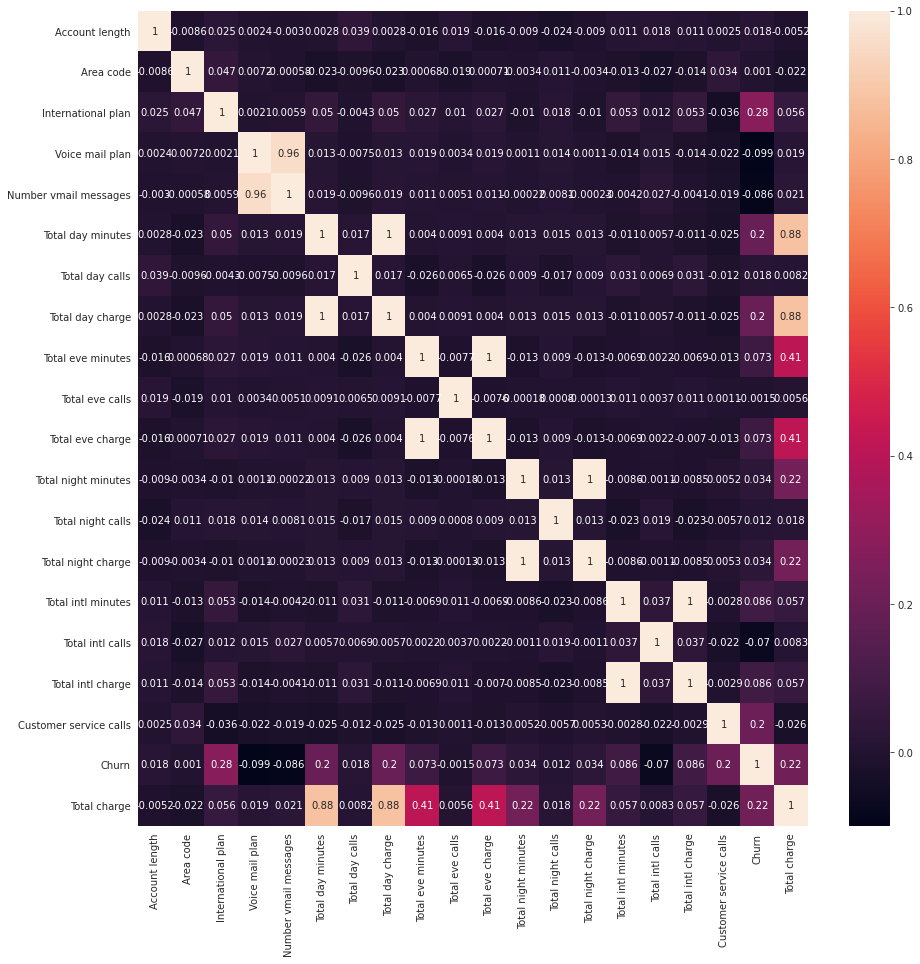

In [26]:
plt.figure(figsize=(15,15))
sns.heatmap(train2.corr() , annot =True)

We can notice that:
Some features are correlated to each other (have a high coefficient with each other).

'Total day minutes' and 'Total day charge' for example are directly related because their coeff is 1, so we'll delete one of them. I choose to delete all the columns with the minutes count because they are redundant.

In [27]:
train3 = train2.drop(['Total day minutes','Total eve minutes','Total night minutes', 'Total intl minutes'], axis=1)


Now, we'll select the best features that have the highest correlation with the target 'Churn'.

In [28]:
features = ['International plan','Total charge','Customer service calls']
X_init = train3[features]
y = train3['Churn']
Xtest_init = test2[features]
ytest = test2['Churn']

In [29]:
X_init.head()

,International plan,Total charge,Customer service calls
0,0,75.56,1
1,0,59.24,1
2,0,62.29,0
3,1,66.80,2
4,1,52.09,3


Here comes the scaling part...
The data range in 'Total charge' is higher that other features, so we'll scale it.


In [30]:
# mix-max scale the data between 0 and 1
X = minmax_scaling(X_init, columns = features)
Xtest = minmax_scaling(Xtest_init, columns = features)
Xtest

,International plan,Total charge,Customer service calls
0,0.0,0.709094,0.125
1,0.0,0.415887,0.500
2,0.0,1.000000,0.500
3,0.0,0.214231,0.250
4,0.0,0.345346,0.125
...,...,...,...
662,0.0,0.363595,0.250
663,0.0,0.260390,0.125
664,0.0,0.400552,0.375
665,0.0,0.466800,0.125


# Model Selection

Here comes the juicy part !
Now that our data is ready, lets build our model, but first we'll split X into training data(80%) and validation data(20%)

In [31]:
Xtrain,Xval,ytrain,yval = train_test_split(X,y,train_size=0.8)

In [32]:
Xtrain.shape

(2132, 3)

In [33]:
Xval.shape

(534, 3)

In [34]:
ytrain.shape

(2132,)

In [35]:
yval.shape

(534,)

We'll make a list of tuples. Each tuple contains the model name and the model creation instance. Then, we'll use each model with cross validation technique k-folds to avoid over-fitting. The choice of the best model will depend on its score.

In [36]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []
for name,model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_result = model_selection.cross_val_score(model,Xtrain,ytrain, cv = kfold, scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

LR 0.8489732789258919
LDA 0.8409986398139615
KNN 0.920277741213637
CART 0.8916502128032995
RF 0.8972796279233031
NB 0.84615857136589
SVM 0.8925957614847967


KNeighboursClassifier model has the highest score, hence it will be chosen. We'll choose the best n_neighbours parameter using Grid Search which is a class used to fine-tune your model to get the best results.

In [37]:
chosen_model = KNeighborsClassifier()
param = {'n_neighbors': [1,2,3,4,5,6,7]}
grid = GridSearchCV(estimator= chosen_model, param_grid=param, cv=5)
grid.fit(Xtrain,ytrain)
print(grid.best_params_)


{'n_neighbors': 5}


In [38]:
best_model = KNeighborsClassifier(n_neighbors=5)
best_model.fit(Xtrain,ytrain)
pred_val = best_model.predict(Xval)
pred = best_model.predict(Xtest)

Let's evaluate our model:

In [39]:
print("Accuracy Score is:")
print(accuracy_score(ytest, pred))
print(accuracy_score(yval, pred_val))
print()

Accuracy Score is:
0.9070464767616192
0.9138576779026217



In [40]:
print("Classification Report:")
print(classification_report(ytest, pred))

Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.94      0.95       572
        True       0.66      0.71      0.68        95

    accuracy                           0.91       667
   macro avg       0.81      0.82      0.81       667
weighted avg       0.91      0.91      0.91       667



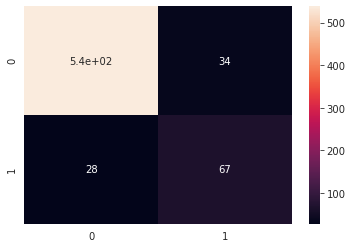

In [41]:
conf = confusion_matrix(ytest,pred)
label = ["0","1"]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label)
plt.show()

# Customers Clustering

Telecom companies use recommendation engines to suggest the best packages for the clients based on their history. Customer clustering helps alot in segmentation of customers into groups of similarities. I'm not going to build a recommendation engine here, but rather I'll do the clustering.

I'll start with k-means clustering which requires the data to be numerical, so I'll deal with the processed dataset.
Also, we'll make an elbow curve to determine the optimal number of clusters.

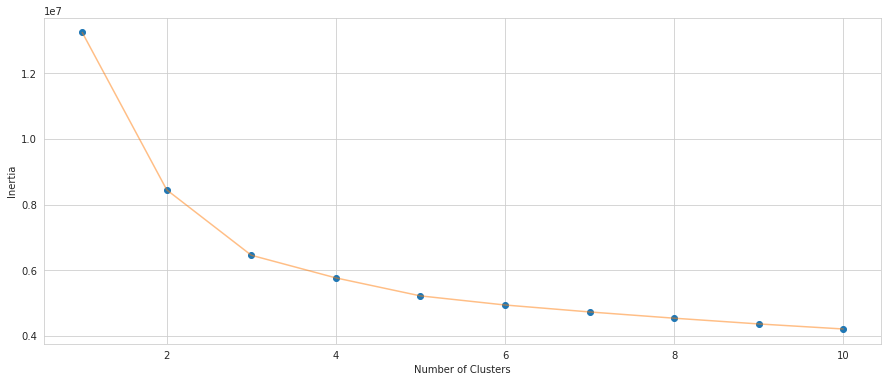

In [42]:
# train3 is fine for this.
clust_data = train3.drop(['Churn','State'], axis=1)
inertia = []
for i in range(1,11):
    clust_model = KMeans(n_clusters= i , init='k-means++', n_init=10)
    clust_model.fit(clust_data)
    inertia.append(clust_model.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

The optimal number of clusters is 4.

In [43]:
clust_model = KMeans(n_clusters= 4 , init='k-means++', n_init=10)
clusters = clust_model.fit_predict(clust_data)
print(silhouette_score(clust_data, clusters))


0.25617604972398983


Let's add the clusters to the original train data

In [44]:
train['clusters'] = pd.Series(clusters,index=train.index)
train

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge,clusters
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,False,75.56,2
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,False,59.24,2
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,False,62.29,2
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,False,66.80,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,False,52.09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,...,221.4,128,9.96,11.8,5,3.19,2,False,52.17,0
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,...,279.1,83,12.56,9.9,6,2.67,2,False,60.10,2
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,...,191.3,123,8.61,9.6,4,2.59,3,False,63.53,0
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,...,191.9,91,8.64,14.1,6,3.81,2,False,67.74,1


Let's further inspect those clusters:

In [45]:
clust_churn = train.groupby('clusters').Churn.sum()
clust_churn

clusters
0    138
1     53
2    151
3     46
Name: Churn, dtype: int64

In [46]:
train['clusters'].value_counts()

0    1028
2     959
1     342
3     337
Name: clusters, dtype: int64

In [47]:
train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge,clusters
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,False,75.56,2
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,False,59.24,2
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,False,62.29,2
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,False,66.80,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,False,52.09,0


In [48]:
train['charge'] = train['Total charge']
charge_clust = train.groupby('clusters').charge.mean()
charge_clust

clusters
0    59.497004
1    58.436725
2    59.520688
3    59.442789
Name: charge, dtype: float64